<a href="https://colab.research.google.com/github/catpixie-47/FDIP/blob/main/Plastic_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaishnavikinge47","key":"de7986e0752e0ce5d2dbddd551d61bf8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d arnavs19/underwater-plastic-pollution-detection -p /content --unzip


Dataset URL: https://www.kaggle.com/datasets/arnavs19/underwater-plastic-pollution-detection
License(s): Attribution 4.0 International (CC BY 4.0)
 61% 141M/231M [00:00<00:00, 1.47GB/s]
100% 231M/231M [00:00<00:00, 933MB/s] 


In [ ]:
!ls /content | head


kaggle.json
sample_data
underwater_plastics


In [ ]:
import os

base_dir = "/content/underwater_plastics"

print("Folders at top level:", os.listdir(base_dir))

train_dir = os.path.join(base_dir, "train")
print("\nFirst 10 images in train folder:")
print(os.listdir(train_dir)[:10])

valid_dir = os.path.join(base_dir, "valid")
print("\nFirst 10 images in valid folder:")
print(os.listdir(valid_dir)[:10])


Folders at top level: ['train', 'data.yaml', 'test', 'valid']

First 10 images in train folder:
['labels', 'images']

First 10 images in valid folder:
['labels', 'images']


In [ ]:
import os

base_dir = "/content/underwater_plastics"
train_img_dir = os.path.join(base_dir, "train", "images")
train_label_dir = os.path.join(base_dir, "train", "labels")

# pick first image
sample_img = os.listdir(train_img_dir)[0]
print("Sample image file:", sample_img)

# corresponding YOLO label file
label_file = os.path.join(train_label_dir, sample_img.replace('.jpg', '.txt'))
print("Label file path:", label_file)

# read YOLO annotations
with open(label_file, 'r') as f:
    lines = f.readlines()

print("Annotations in YOLO format (class x_center y_center width height):")
for line in lines:
    print(line.strip())


Sample image file: mask_in_the_ocean7_jpg.rf.c849608aba0e6d434781eaa47eaa545e.jpg
Label file path: /content/underwater_plastics/train/labels/mask_in_the_ocean7_jpg.rf.c849608aba0e6d434781eaa47eaa545e.txt
Annotations in YOLO format (class x_center y_center width height):
0 0.2980769230769231 0.15985576923076922 0.07692307692307693 0.08052884615384616
5 0.7908653846153846 0.125 0.41225961538461536 0.19110576923076922
5 0.6141826923076923 0.36177884615384615 0.4891826923076923 0.19471153846153846
5 0.25841346153846156 0.7295673076923077 0.22115384615384615 0.5336538461538461
0 0.6201923076923077 0.7019230769230769 0.41947115384615385 0.4795673076923077


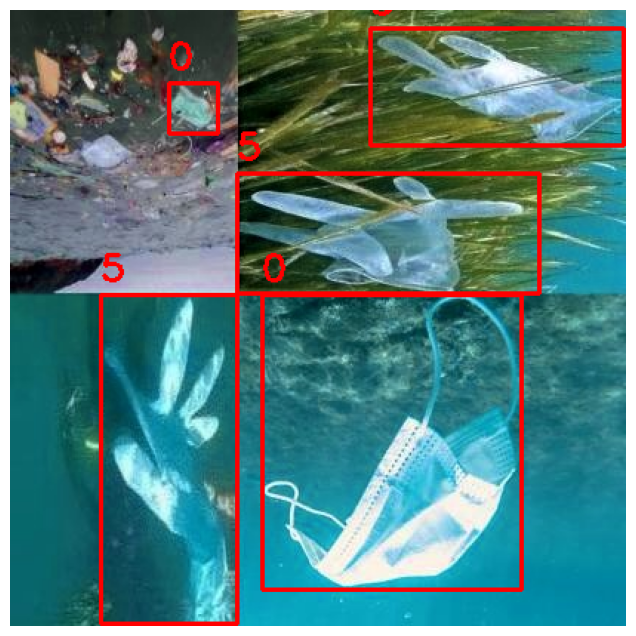

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
img_path = os.path.join(train_img_dir, sample_img)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

# Draw bounding boxes
for line in lines:
    cls, x_center, y_center, bw, bh = map(float, line.strip().split())
    x1 = int((x_center - bw/2) * w)
    y1 = int((y_center - bh/2) * h)
    x2 = int((x_center + bw/2) * w)
    y2 = int((y_center + bh/2) * h)

    cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
    cv2.putText(img, str(int(cls)), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 2)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
!pip install ultralytics -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# Load YOLOv8 pretrained model
model = YOLO("yolov8n.pt")  # nano model for faster training

# Train the model
model.train(
    data="/content/underwater_plastics/data.yaml",  # path to your data.yaml
    epochs=50,
    imgsz=640,
    batch=16,
    name="plastic_detection_model",
    save=True  # saves best and last weights automatically
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/underwater_plastics/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f6427c61b20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   


image 1/1 /content/underwater_plastics/valid/images/uwg_g-210__flipv_jpg.rf.eb4fdcb34115a3ad1b5eab5d4649cb35.jpg: 640x640 1 net, 14.8ms
Speed: 4.2ms preprocess, 14.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


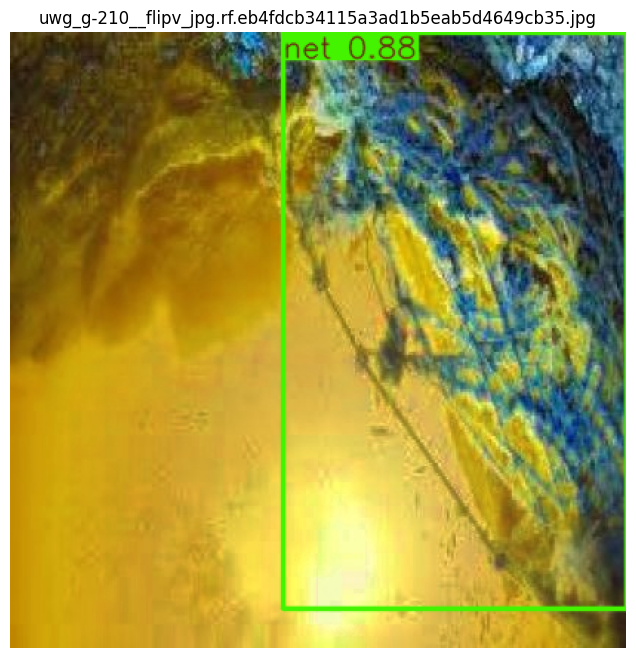


image 1/1 /content/underwater_plastics/valid/images/0211007105251_jpg.rf.8ef7c7f2561bdcc822c077b99464e7a0.jpg: 640x640 1 Mask, 10.0ms
Speed: 3.5ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


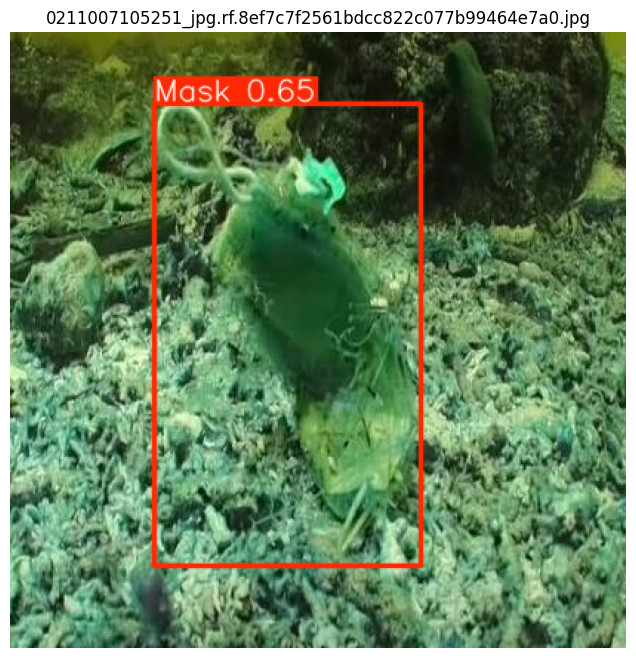


image 1/1 /content/underwater_plastics/valid/images/uwg_g-571_jpg.rf.682f1ed5f5a731afb91e204f3825504e.jpg: 640x640 1 pbag, 9.5ms
Speed: 3.9ms preprocess, 9.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


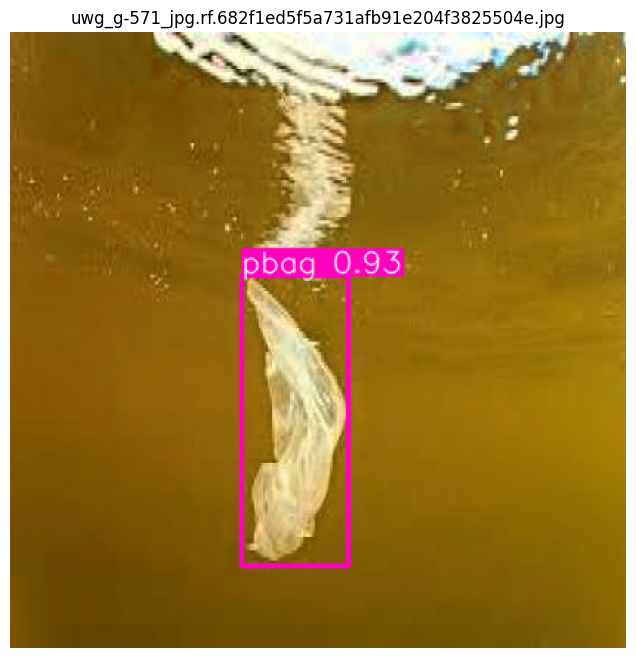


image 1/1 /content/underwater_plastics/valid/images/uwg_g-715_jpg.rf.9fed8c6aa5754d42ffac72ca25551b18.jpg: 640x640 1 pbag, 11.7ms
Speed: 4.7ms preprocess, 11.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


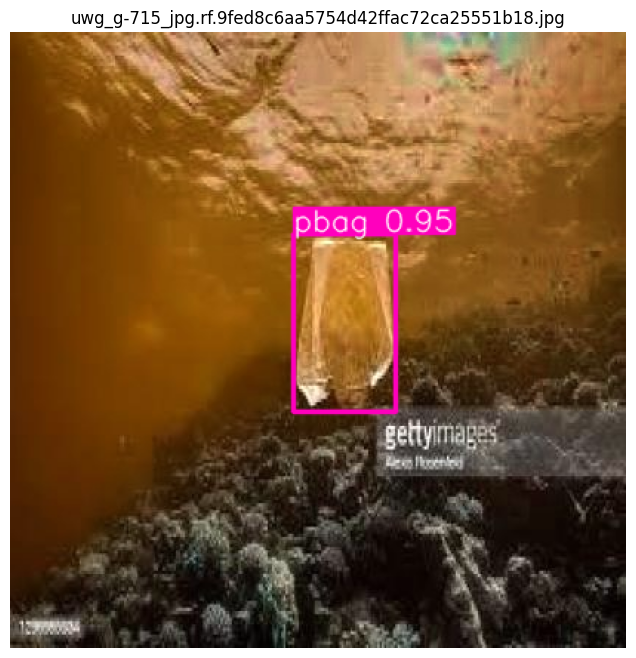


image 1/1 /content/underwater_plastics/valid/images/0211007104914_jpg.rf.01b4713d84c24e2d5b44099298ce9db2.jpg: 640x640 1 misc, 10.6ms
Speed: 3.7ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


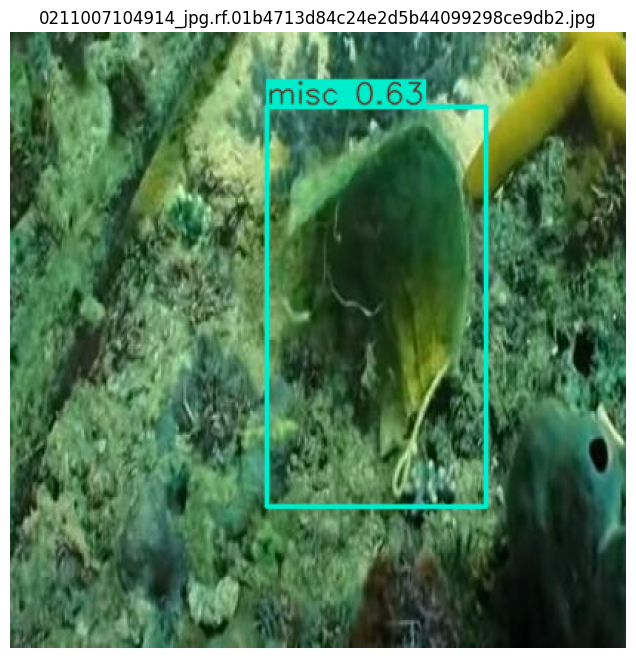

In [13]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

# Load the trained model
model = YOLO("/content/runs/detect/plastic_detection_model/weights/best.pt")

# Path to validation images
val_dir = "/content/underwater_plastics/valid/images"
val_images = os.listdir(val_dir)[:5]  # first 5 images

# Loop over 5 images and show predictions
for img_name in val_images:
    img_path = os.path.join(val_dir, img_name)

    # Predict
    results = model.predict(source=img_path, conf=0.25)

    # Plot predictions
    pred_img = results[0].plot()
    plt.figure(figsize=(10,8))
    plt.title(img_name)
    plt.imshow(pred_img)
    plt.axis('off')
    plt.show()


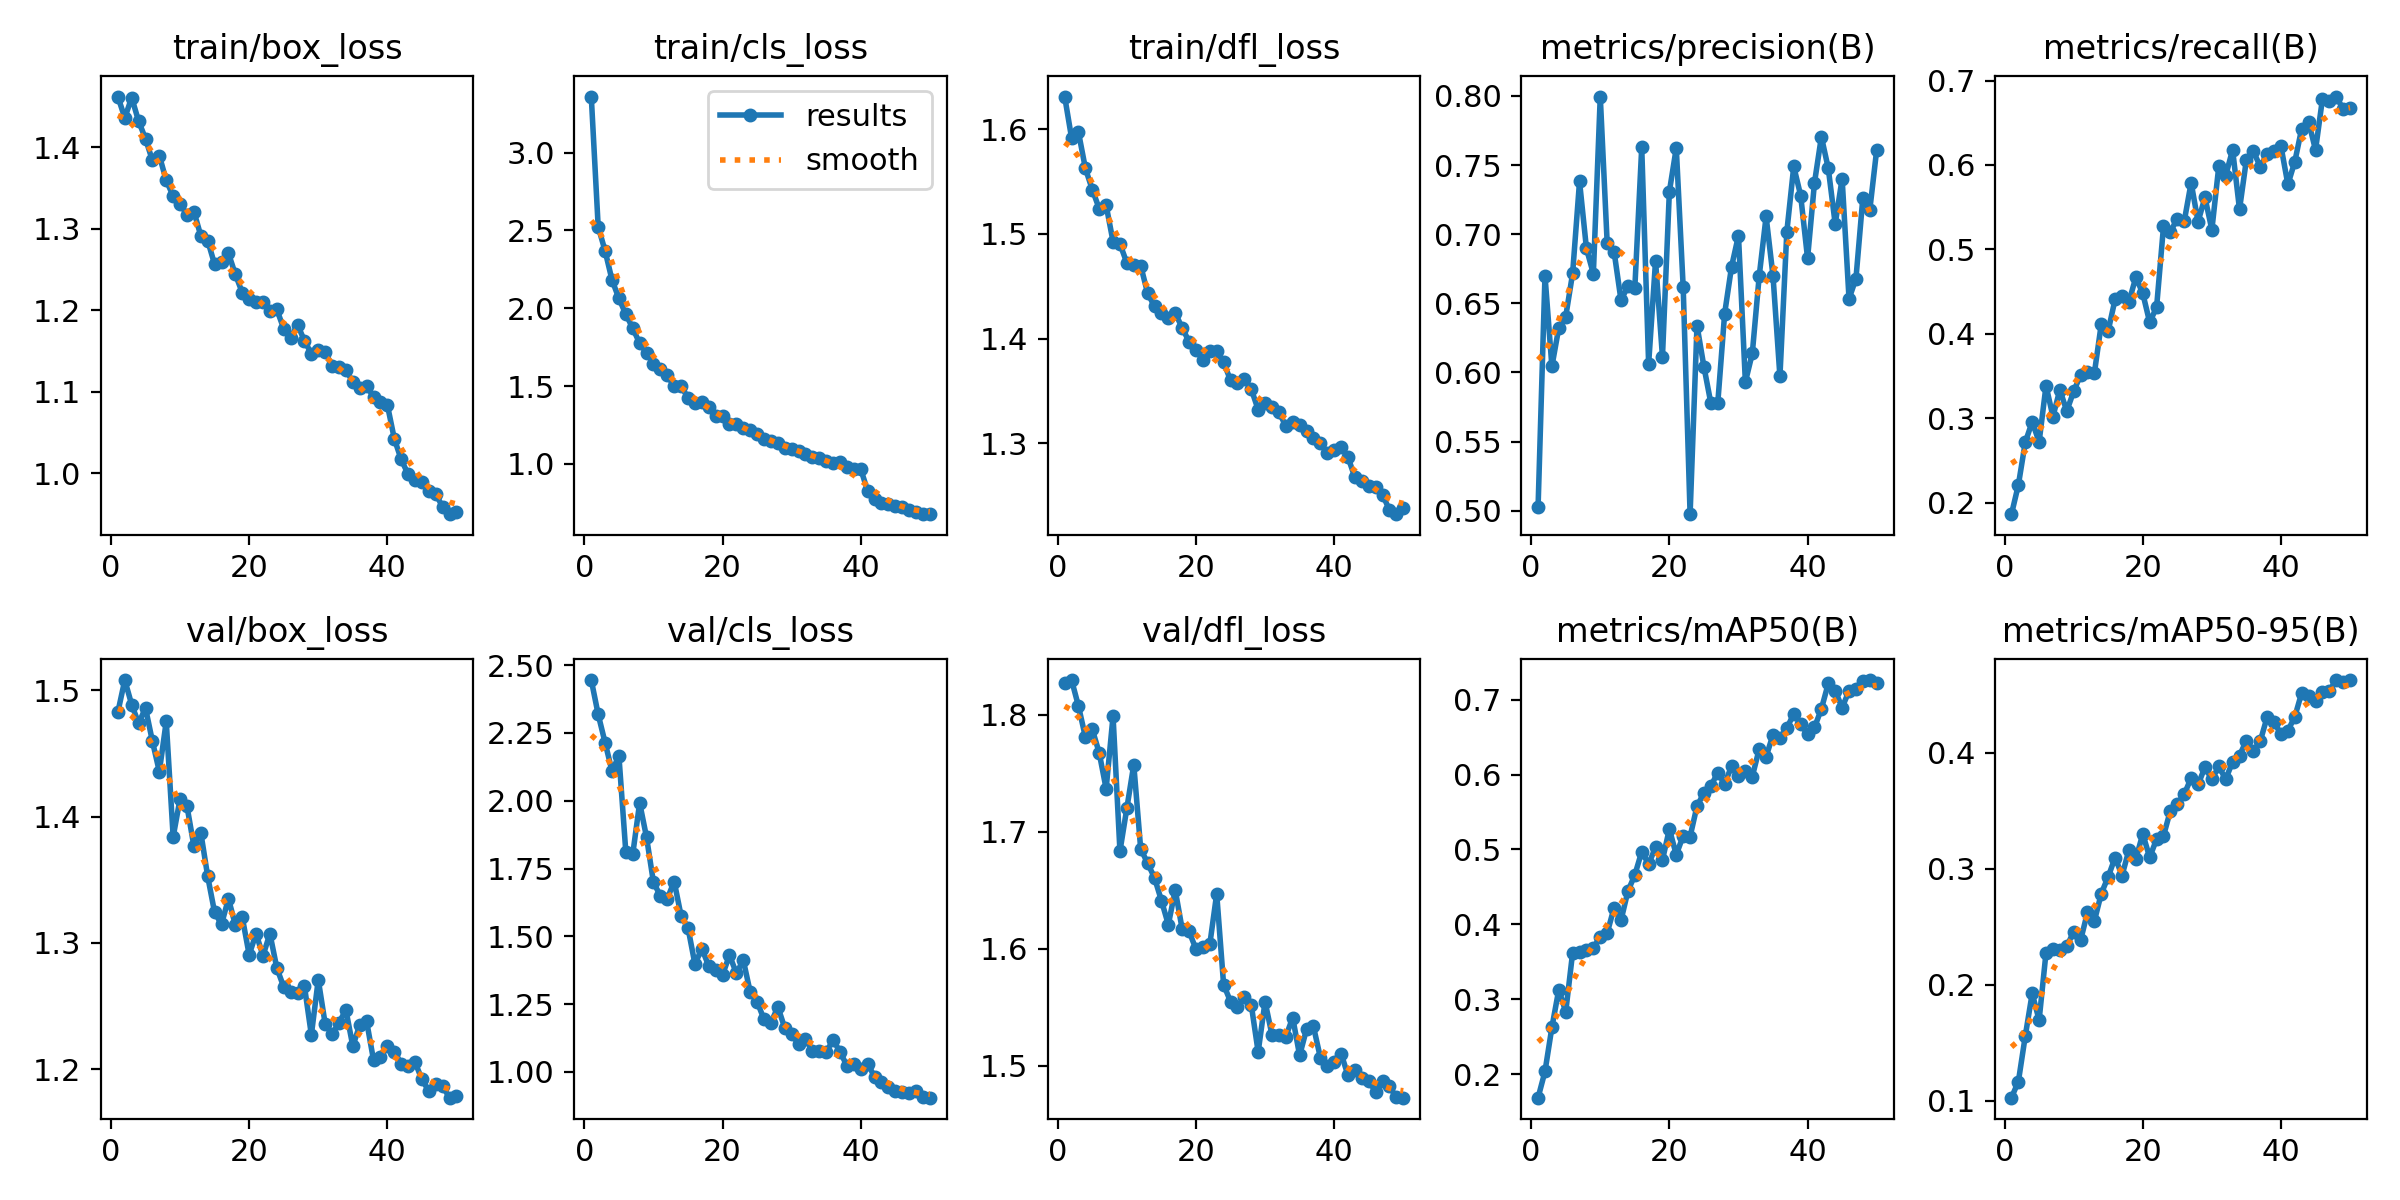

In [14]:
from IPython.display import Image, display
display(Image("/content/runs/detect/plastic_detection_model/results.png"))


In [15]:
metrics = model.val(data="/content/underwater_plastics/data.yaml")
print(metrics)


Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1511.4±461.0 MB/s, size: 53.3 KB)
val: Scanning /content/underwater_plastics/valid/labels.cache... 1001 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1001/1001 2.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 63/63 5.9it/s 10.6s
                   all       1001       1891      0.761      0.667      0.722      0.463
                  Mask         77         90      0.939      0.667      0.839       0.62
                   can         18         20      0.825       0.65      0.788      0.269
             cellphone         61         71      0.933      0.972      0.985      0.867
           electronics         27         40      0.901      0.675      0.783      0.484
               gbottle         36         82      0.608      0.744      0.725      0.506
                 glove   